# Assignment 5 Multi Linear Regression

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years.

(Dataset -50_Startups)

In [1]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling as pp

In [2]:
# Importing the dataset of 50_Startups
data = pd.read_csv("50_Startups (1).csv")

In [3]:
# Reading the data
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
# Top 5 rows
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# Last 5 rows
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
# Column names
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [10]:
# Counting the rows in the dataset
len(data)

50

In [11]:
# Counting the columns in the dataset
len(data.columns)

5

In [12]:
# Renaming the columns
data1 = data.rename({'R&D Spend':'RDS', 'Administration':'ADMS','Marketing Spend':'MKTS'},axis = 1)

In [13]:
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [14]:
# To check the duplicated values or data
data1[data1.duplicated()]

,RDS,ADMS,MKTS,State,Profit


In [15]:
data1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [16]:
data1.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


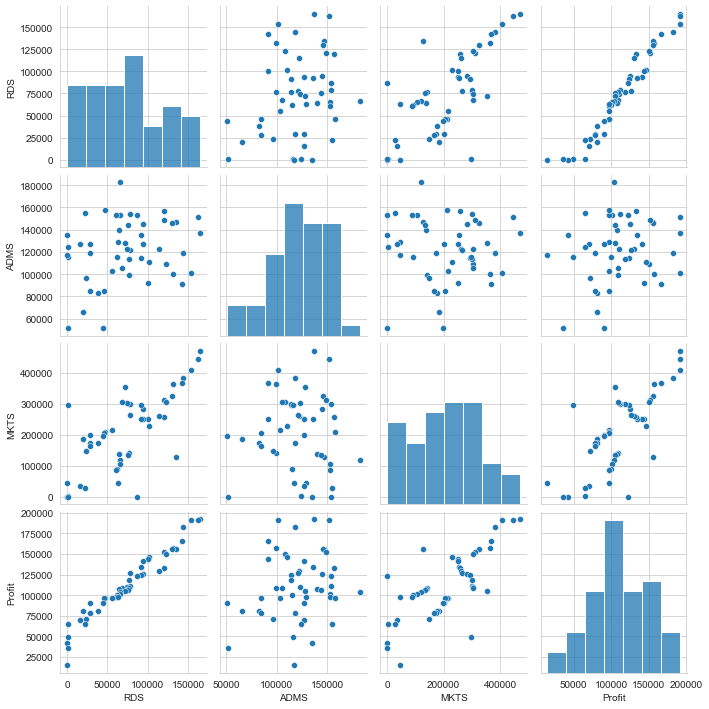

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style='whitegrid')
sns.pairplot(data1)

In [18]:
 pip install statsmodels --upgrade

Note: you may need to restart the kernel to use updated packages.


In [20]:
### Model Building

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()

In [21]:
model

In [22]:
### MODEL TESTING
# Finding Coefficient parameters

model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [23]:
# Finding tvalues and pvalues

model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

In [24]:
#### Finding rsquared values

model.rsquared , model.rsquared_adj  
#### Model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

In [25]:
slr_a=smf.ols("Profit~ADMS",data=data1).fit()
slr_a.tvalues , slr_a.pvalues 

# ADMS has in-significant pvalue

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [26]:
# MKTS has significant p value
slr_m=smf.ols("Profit~MKTS",data=data1).fit()
slr_m.tvalues , slr_m.pvalues  



(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [29]:
# varaibles have significant pvalues
mlr_am=smf.ols("Profit~ADMS+MKTS",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues 

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

# Model Validation Two Techniques
1. Collinearity Check & 2. Residual Analysis

In [30]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


In [ ]:
# No any variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

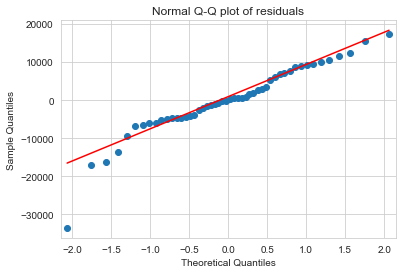

In [31]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [32]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [33]:
# Test for Homoscedasticity or Heteroscedasticity 
# (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std() 

# User defined z = (x - mu)/sigma

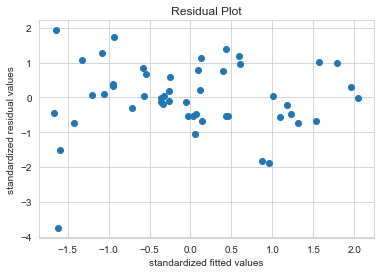

In [34]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    
# exog = x-variable & endog = y-variable

eval_env: 1


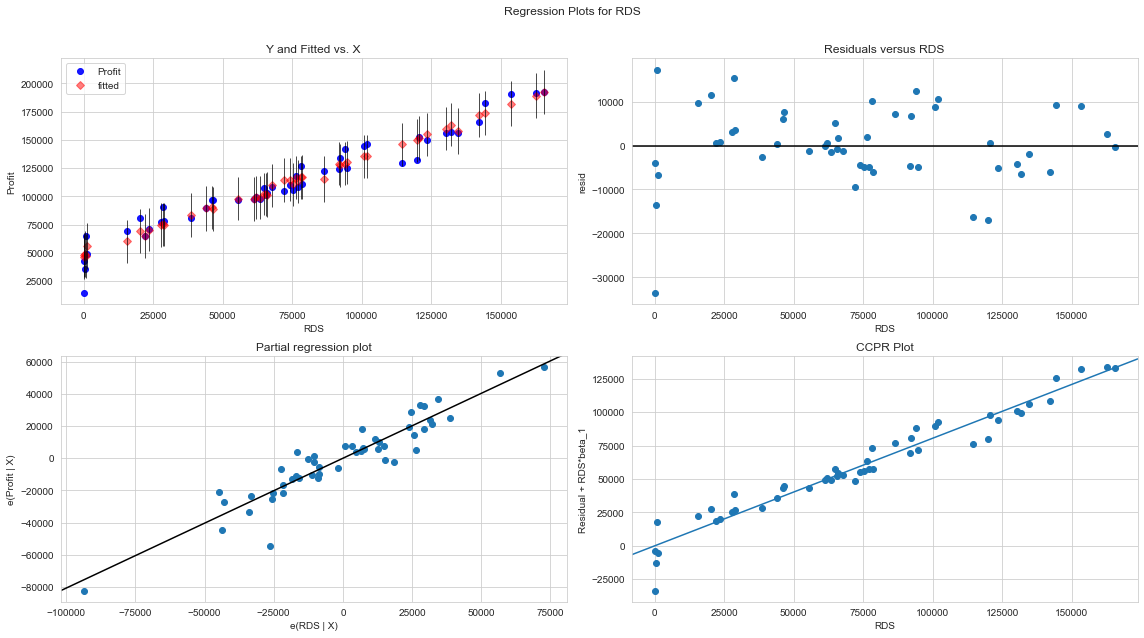

In [35]:
fig=plt.figure(figsize=(16,9))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


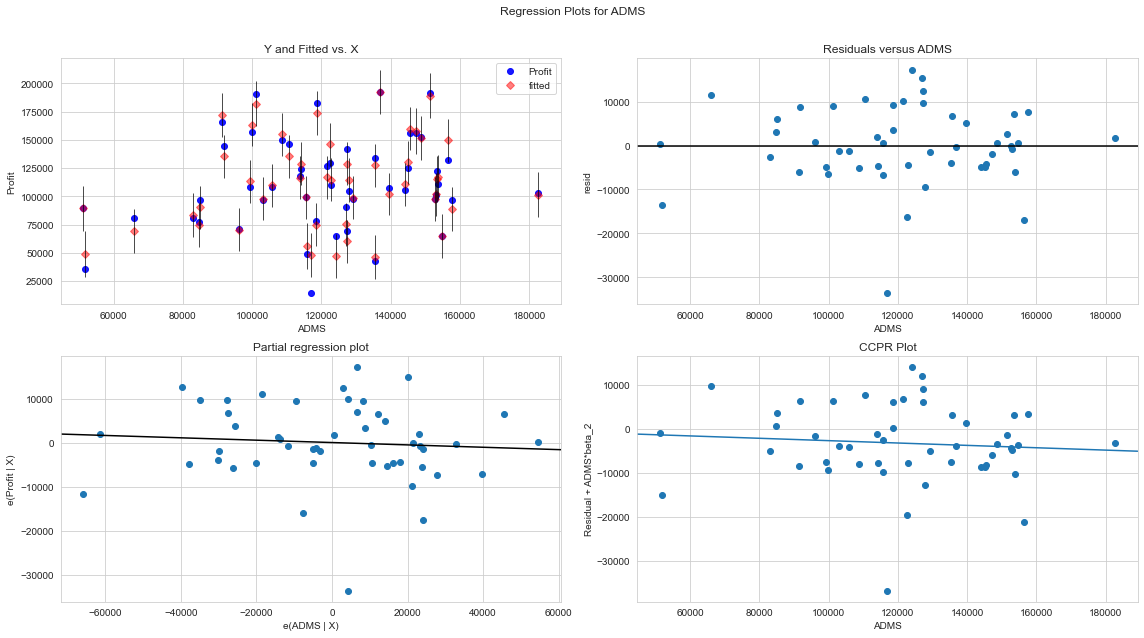

In [36]:
fig=plt.figure(figsize=(16,9))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

eval_env: 1


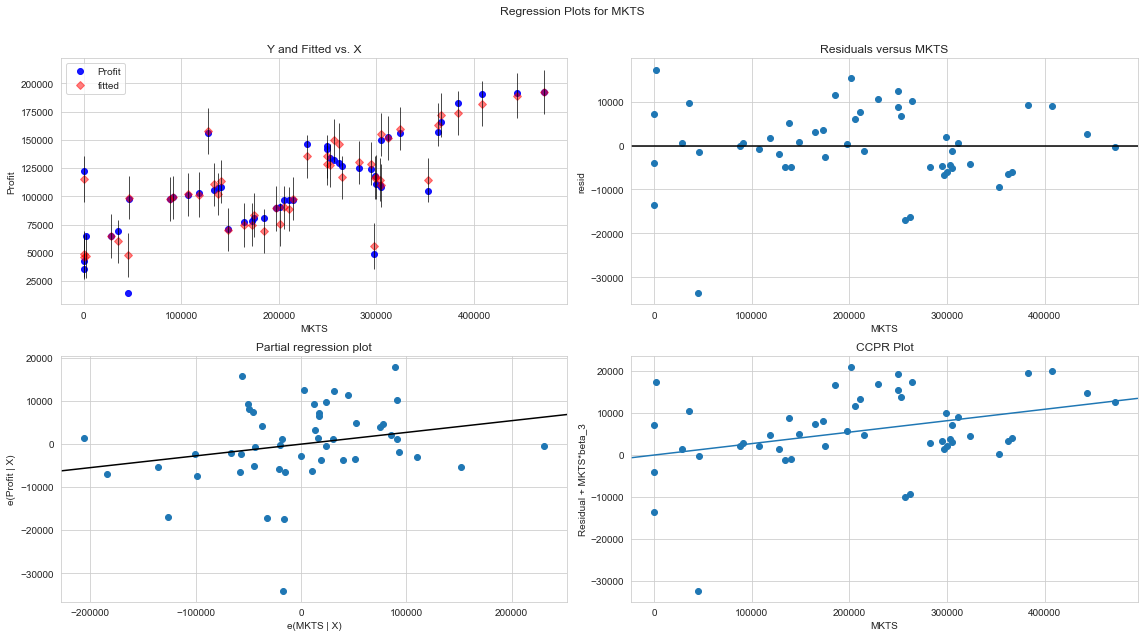

In [37]:
fig=plt.figure(figsize=(16,9))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)
## Two Techniques : 1. Cook's Distance & 2. Leverage value# 

In [38]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

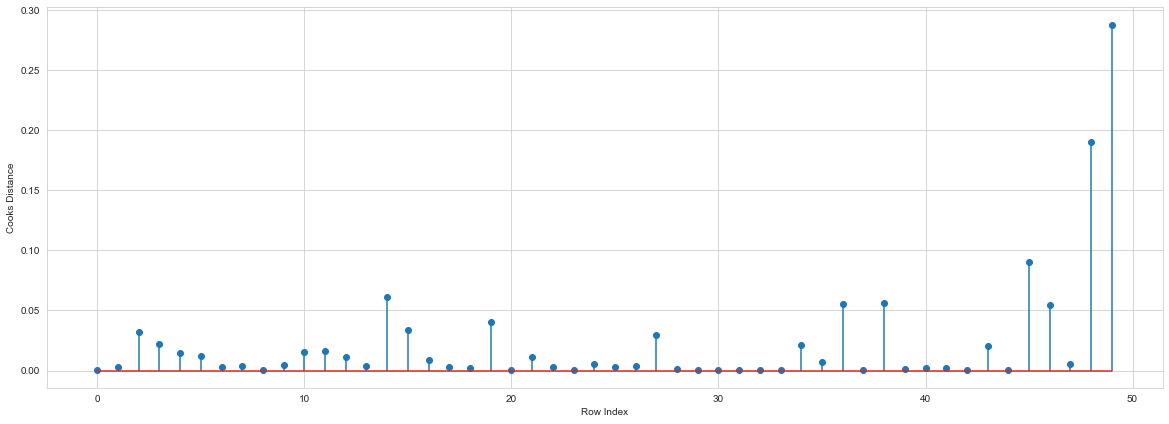

In [39]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()


In [40]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

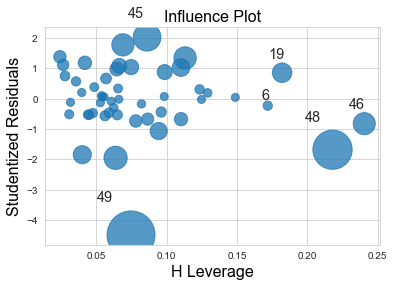

In [41]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [42]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [43]:
data1[data1.index.isin([49])] 

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model

In [44]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Delection Diagnostic & Final Model

In [45]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [46]:
final_model.rsquared

0.9613162435129847

In [47]:
data2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Prediction

In [48]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [49]:
# Manual Prediction of Price
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [50]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [51]:
## Table Containing R^2 Values

d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


Dataset- ToyotaCorolla


Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)



In [52]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [53]:
pip install -U scikit-learn scipy matplotlib

  Using cached matplotlib-3.5.2-cp39-cp39-win_amd64.whl (7.2 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Sunita\\anaconda3\\Lib\\site-packages\\matplotlib\\_c_internal_utils.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [54]:
data = pd.read_csv("ToyotaCorolla (11).csv")

In [55]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


EDA

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [57]:
data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [58]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [59]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
data.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [61]:
data2=pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)
data2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [62]:
data3=data2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [63]:
data3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [64]:
data3[data3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [65]:
data4=data3.drop_duplicates().reset_index(drop=True)
data4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [66]:
data4.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


Correlation Analysis

In [67]:
data4.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


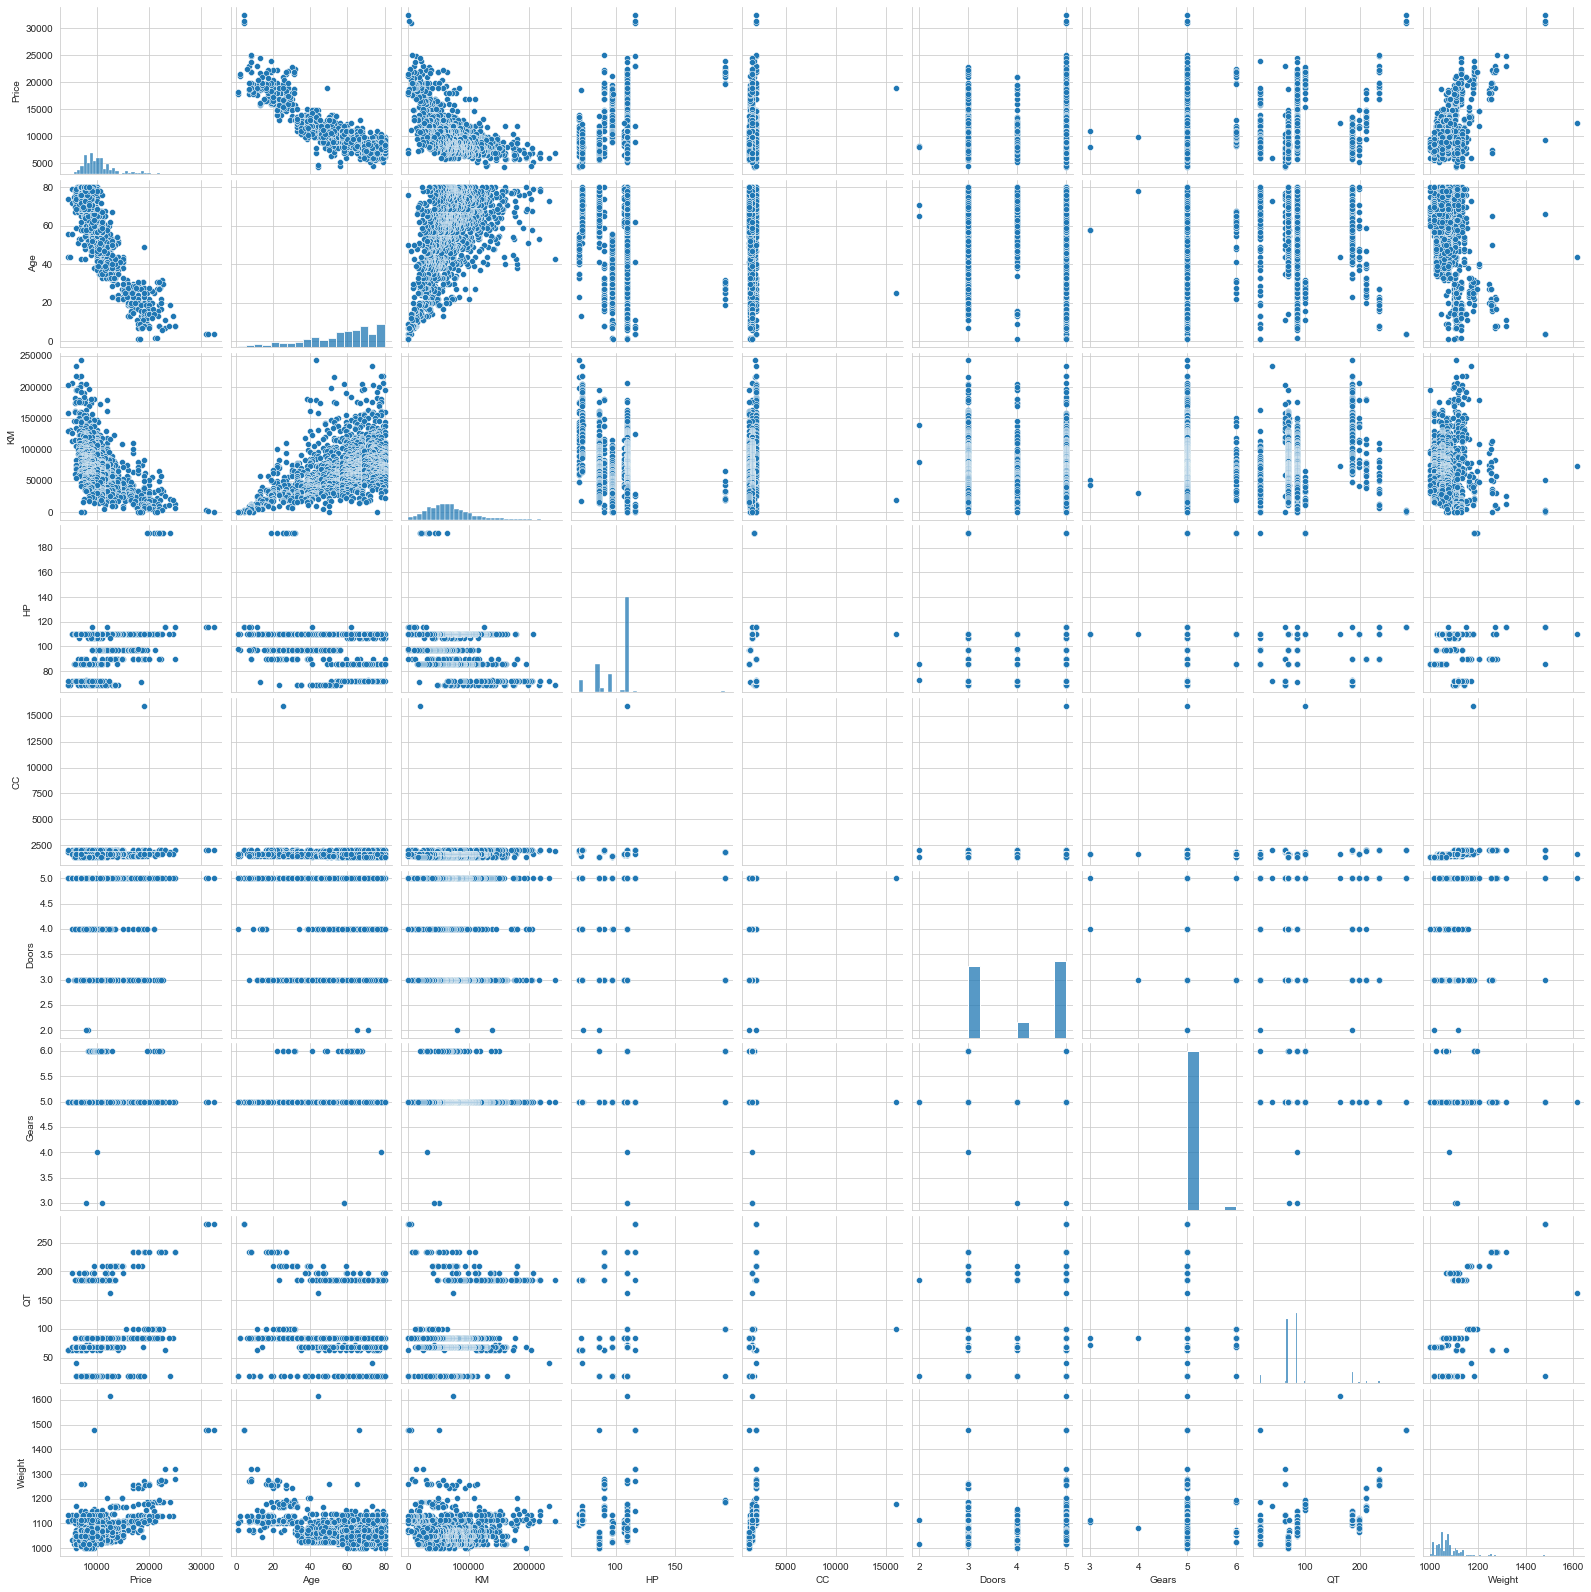

In [68]:
sns.set_style(style='whitegrid')
sns.pairplot(data4)

Model Building

In [69]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data4).fit()

In [70]:
model

Model Testing

In [71]:
# Finding Coefficient parameters
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [72]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [73]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  
# Model accuracy is 86.17%

(0.8625200256947, 0.8617487495415146)

In [74]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their tvalues and pvalues

In [75]:
slr_c=smf.ols('Price~CC',data=data4).fit()
slr_c.tvalues , slr_c.pvalues # CC has significant pvalue

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [76]:
slr_d=smf.ols('Price~Doors',data=data4).fit()
slr_d.tvalues , slr_d.pvalues 
# Doors has significant pvalue

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [77]:
mlr_cd=smf.ols('Price~CC+Doors',data=data4).fit()
mlr_cd.tvalues , mlr_cd.pvalues 
# CC & Doors have significant pvalue

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

Model Validation Techniques
Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [78]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=data4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=data4).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=data4).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=data4).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=data4).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=data4).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=data4).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=data4).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [93]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

In [79]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from scipy.signal._signaltools import _centered

In [80]:
import statsmodels.api

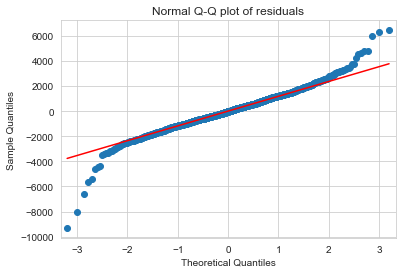

In [81]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q')
# 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [82]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [83]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [84]:
# Test for Homoscedasticity or Heteroscedasticity 
# (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std() 
# User defined z = (x - mu)/sigma

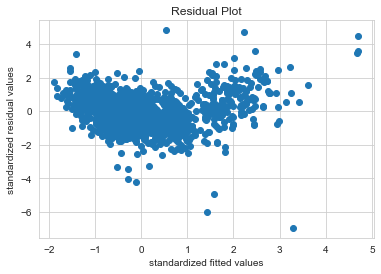

In [85]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 


In [86]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


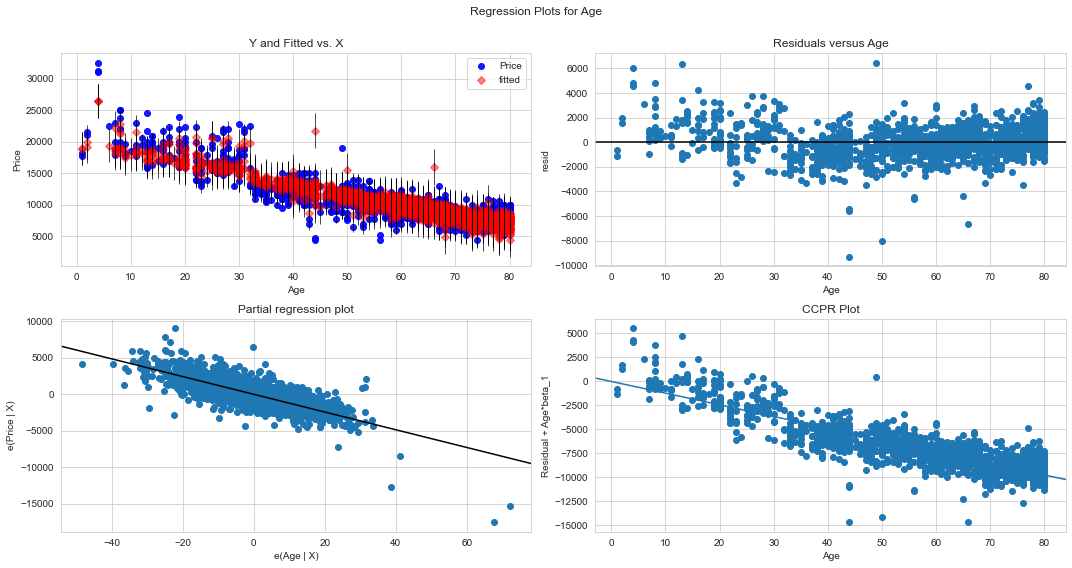

In [88]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


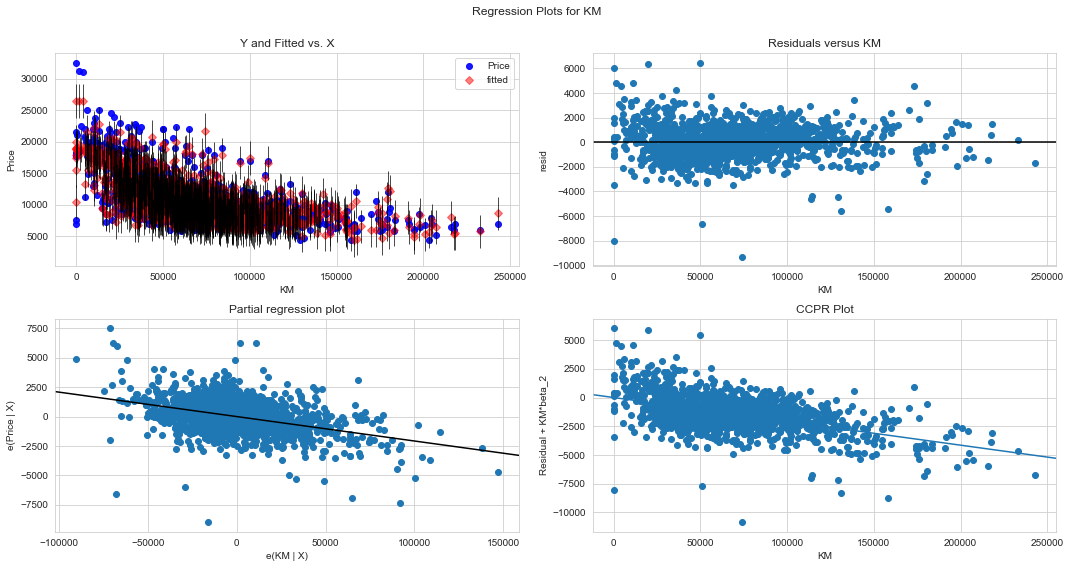

In [89]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


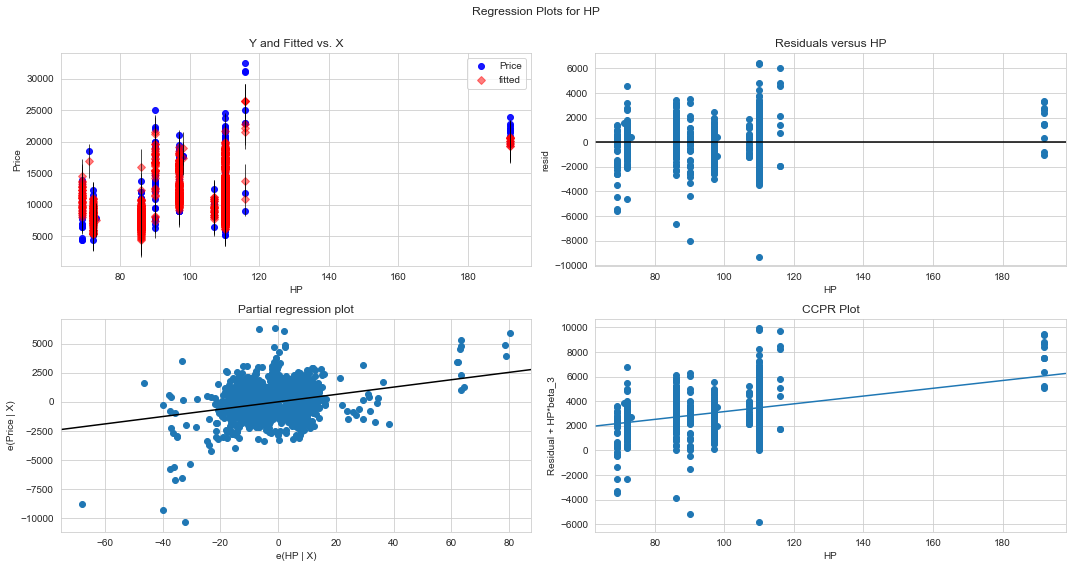

In [90]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


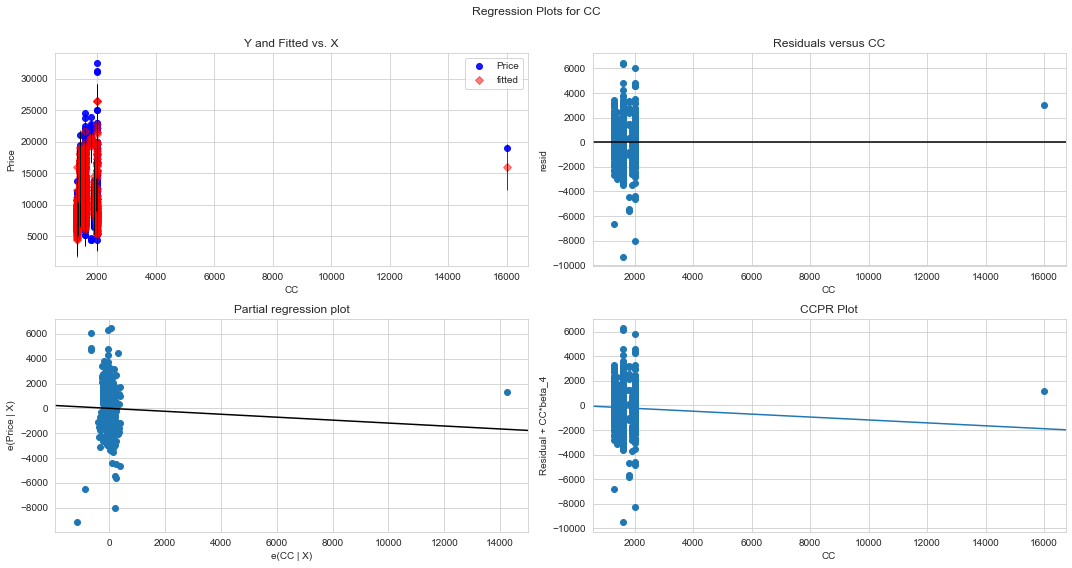

In [91]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


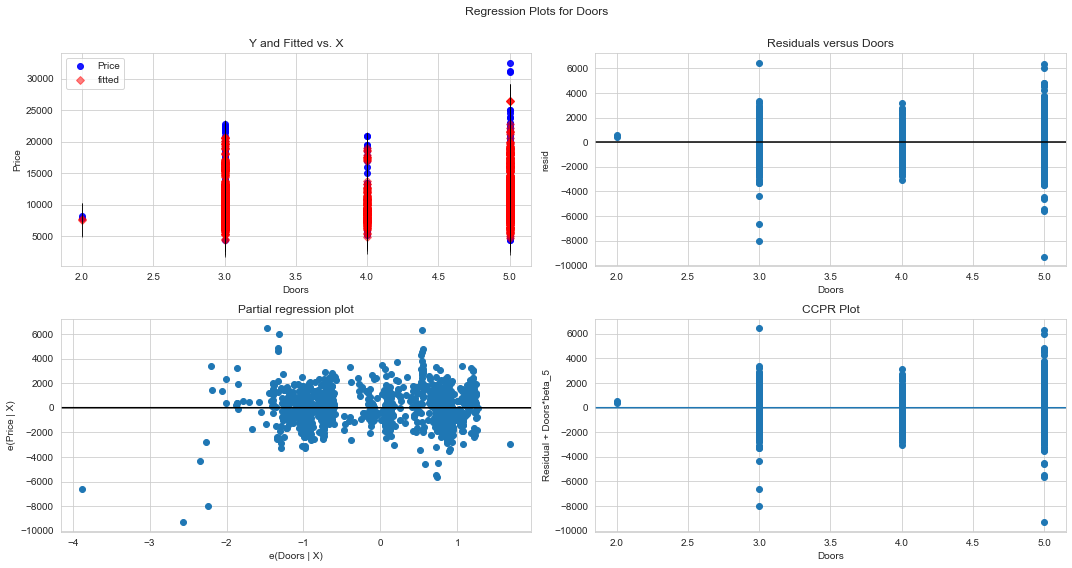

In [92]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


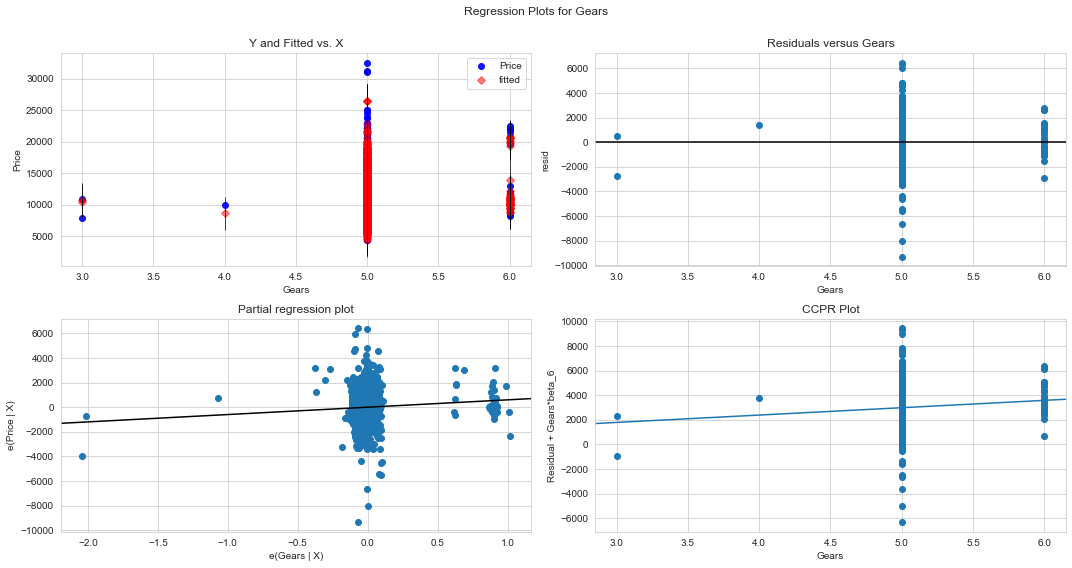

In [93]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


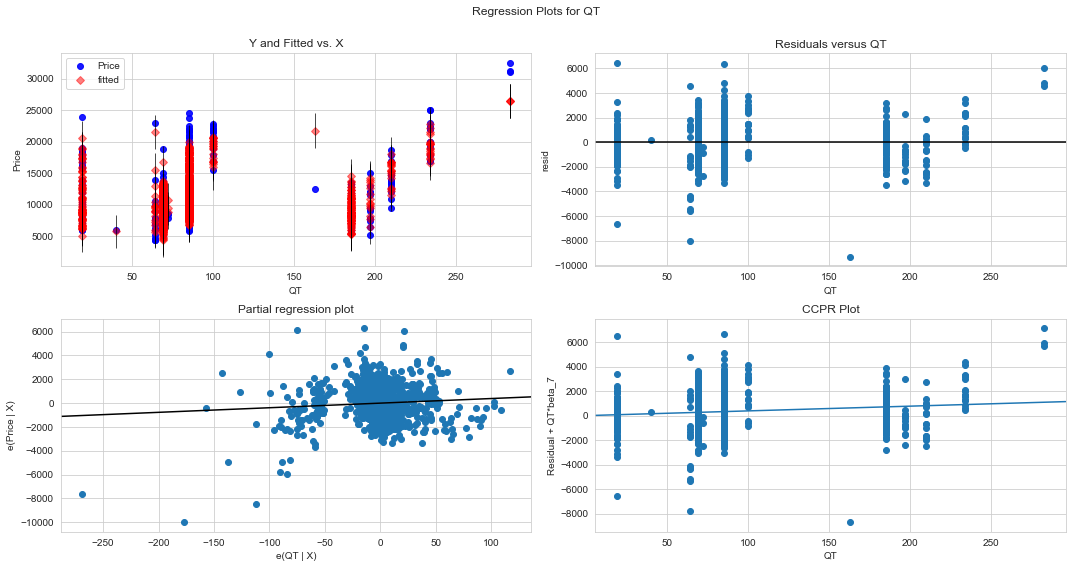

In [94]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


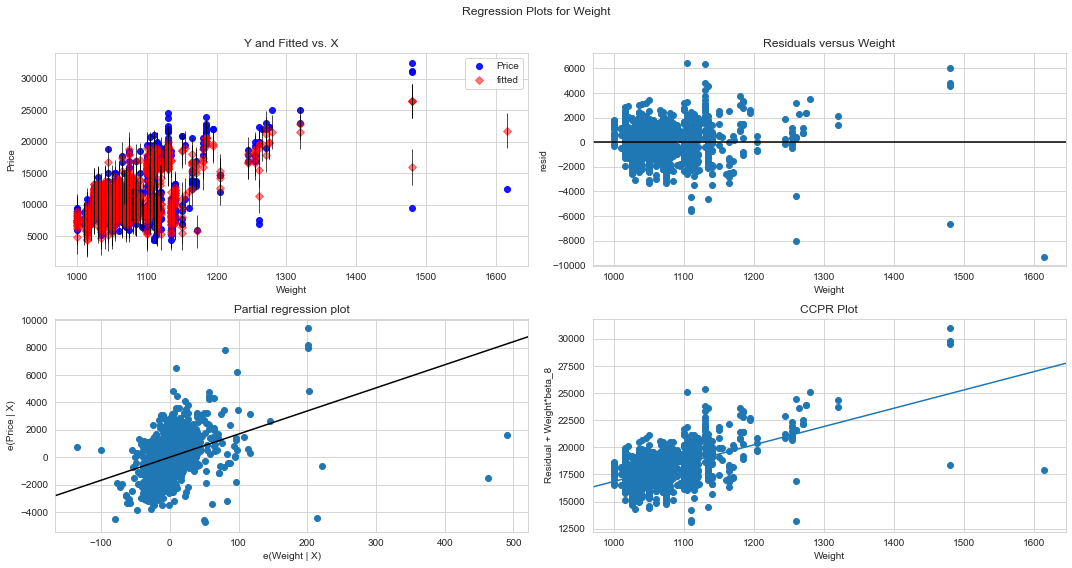

In [95]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)
# Two Techniques : 1. Cook's Distance & 2. Leverage value

In [96]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

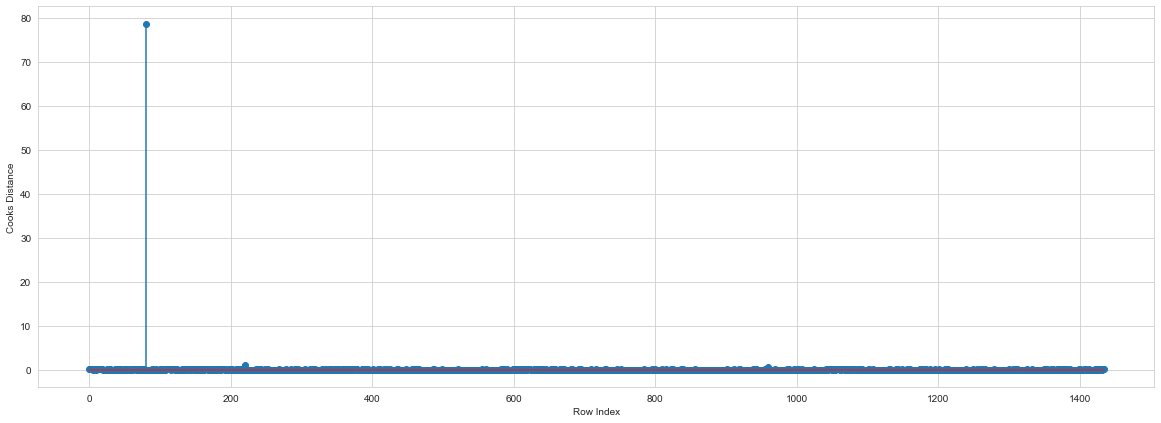

In [97]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [98]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.7295058224916)

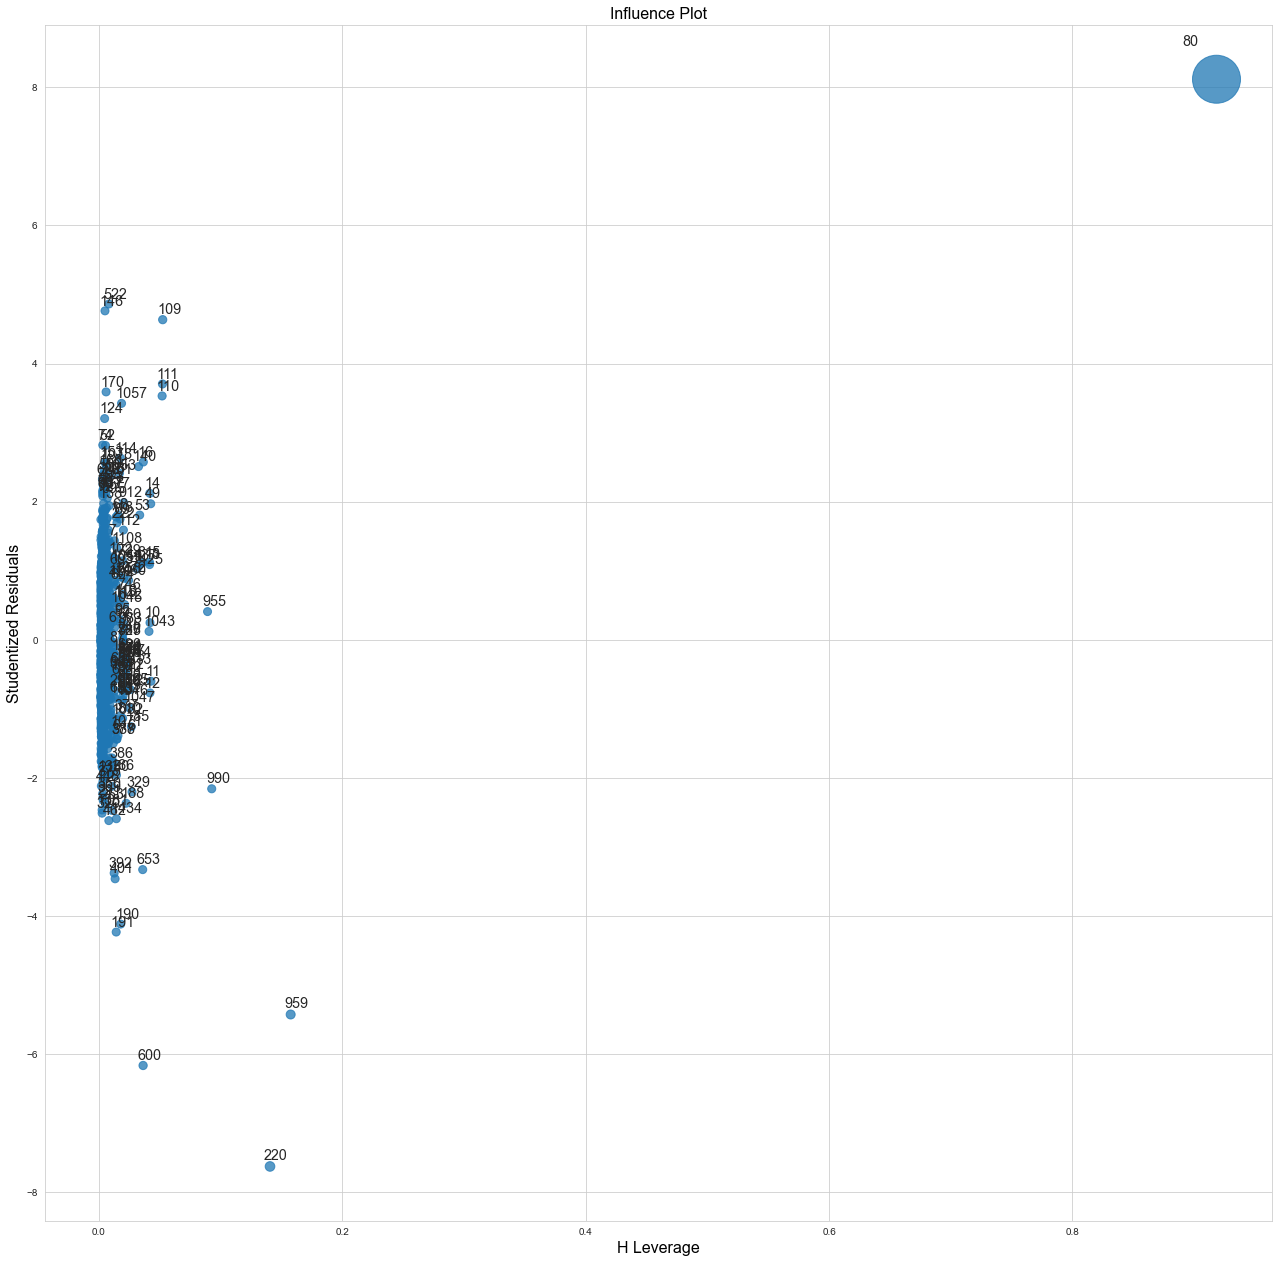

In [99]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(22,22))
fig=influence_plot(model,ax = ax)

In [100]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data4.shape[1]
n=data4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff


0.020905923344947737

In [101]:
data4[data4.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the Model

In [102]:
# Creating a copy of data so that original dataset is not affected
data_new=data4.copy()
data_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [103]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data5=data_new.drop(data_new.index[[80]],axis=0).reset_index(drop=True)
data5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015



# Model Deletion Diagnostics and Final Model


In [104]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data5).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data5=data5.drop(data5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data5
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data5).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139028
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [105]:
final_model.rsquared
# Model Accuracy is increased to 90.02%

0.9003762532318559

In [106]:
data5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


# Model Prediction

In [107]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [108]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14398.815471
dtype: float64

In [109]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data5)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64